In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
from transformers import pipeline
import torch

In [ ]:
classifier = pipeline('sentiment-analysis')
type(classifier)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

transformers.pipelines.text_classification.TextClassificationPipeline

In [ ]:
classifier('the movie i saw last night was very thrilling. i really enjoyed that movie')

[{'label': 'POSITIVE', 'score': 0.9998838901519775}]

In [ ]:
classifier([
    'i am good',
    'u r bad'
])

[{'label': 'POSITIVE', 'score': 0.999847412109375},
 {'label': 'NEGATIVE', 'score': 0.9988162517547607}]

In [ ]:
airline_tweets = pd.read_csv('Tweets.csv')

In [ ]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
airline_tweets.shape

(9155, 15)

In [ ]:
airline_tweets.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,4071
negativereason_confidence,3148
airline,0
airline_sentiment_gold,9134
name,0
negativereason_gold,9138
retweet_count,0


In [ ]:
df = airline_tweets[['airline_sentiment', 'text']]

In [ ]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


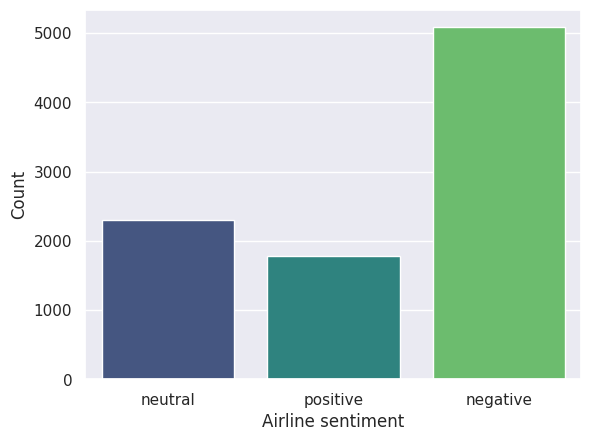

In [ ]:
sns.countplot(df, x='airline_sentiment', palette='viridis')
plt.xlabel('Airline sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
df = df[df['airline_sentiment'] != 'neutral']

In [ ]:
df['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,5084
positive,1776


In [ ]:
df['target'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [ ]:
df.shape[0]

6860

In [ ]:
texts = df['text'].tolist()
predictions = classifier(texts)
predictions[:5]

[{'label': 'POSITIVE', 'score': 0.6070863604545593},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553208947181702}]

In [ ]:
probs = [pred['score'] if pred['label'].startswith ('p') else 1 - pred['score'] for pred in predictions]

In [ ]:
preds = np.array([1 if pred['label'].startswith ('p') else 0 for pred in predictions])

In [ ]:
print("Accuracy:", np.mean(df['target']==preds))

Accuracy: 0.7411078717201166


In [ ]:
poems = pd.read_csv('robert_frost_collection.csv')

In [ ]:
poems.head()

,Name,Content,Collection,Year of Publication
0,NaN,NaN,NaN,NaN
1,Stopping by Woods on a Snowy Evening,Whose woods these are I think I know. \nHis ...,New Hampshire,1923.0
2,Fire and Ice,"Some say the world will end in fire,\nSome say...",New Hampshire,1923.0
3,The Aim was Song,Before man came to blow it right\nThe wind onc...,New Hampshire,1923.0
4,The Need of Being Versed in Country Things,The house had gone to bring again\nTo the midn...,New Hampshire,1923.0


In [ ]:
content = poems['Content'].dropna().tolist()

In [ ]:
lines = []
for poem in content:
  for line in poem.split('\n'):
    lines.append(line.rstrip())

In [ ]:
lines = [line for line in lines if len(line) >0]
lines[:5]

['Whose woods these are I think I know.',
 'His house is in the village though;',
 'He will not see me stopping here',
 'To watch his woods fill up with snow.',
 'My little horse must think it queer']

In [ ]:
gen = pipeline('text-generation')

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
lines[0]

'Whose woods these are I think I know.'

In [ ]:
gen(lines[0], max_length=20)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "Whose woods these are I think I know. They're different to mine but they're not nearly"}]

In [ ]:
gen(lines[1], max_length = 30, num_return_sequences = 2)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'His house is in the village though; there he resides, and on his bed his wife is gone to live with him.\n\nThe rest of'},
 {'generated_text': 'His house is in the village though; on that occasion and others, a friend who is present from work and travels through the village asked permission to come'}]

In [ ]:
import textwrap
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [ ]:
out = gen(lines[2], max_length=30)
print(wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


He will not see me stopping here.  Do not let me leave here.  I am
here to stay, with you."

"Yes?"


In [ ]:
prompt = 'How to get into MS(Research) in IIT Kharagpur?'
out = gen(prompt, max_length=100)
print(wrap(out[0]['generated_text']))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


How to get into MS(Research) in IIT Kharagpur?

For details on the
current state of the PhD in IIT in IIT Kharagpur, see this article and
a brief overview of the information on the website of the IIT
Kharagpur Office, entitled The State of the PhD of IIT in IIT
Kharagpur:

Please note that this post was edited for the latest
version of this blog post and contains the following terms.

What
